# EDA - Part 002
Dataset(s) - Students Performance

### Dataset Information

#### Dataset feature general description
The variables that will be taken into account are the following:

| Feature Name | Dataset Feature description | Possible Values in Dataset |
|--|--|--|
| Gender | Student gender | Male, Female |
| Race ethnicity | Student ethnicity | Group A, B, C, D, E | 
| Parental level of Education | The level of education of the student's parents| some high school, high school, associate's degree, bachelor's degree, some college, master's degree|
| Lunch | - Whether the student had lunch or not before taking the tests| standard, reduced/free, None |
| Test Preparation Course | Whether a student had completed a test preparation course or not. | None, completed |
| Math score | A math test score | score from 0 to 100 |
| Reading score | A reading test score | score from 0 to 100 |
| Writing score | A writing test score | score from 0 to 100 |


Data Checks to perform
- Missing Values
- Duplicates
- Data Type
- Number of unique values in each column
- Statistics of current dataset
- Various categories present in categorical columns

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("/Users/luis/Documents/Programming/dev/0760 Complete MLOps Bootcamp With 10 Plus End To End ML Projects Krish Naik/venv_0760_Complete_MLOps_Bootcamp_Krish_Naik_312_01/0760_Course/Section 20 End To End DS Project implementation With Mulitple AWS, Azure Deployment/venv_0760_20_01_312_001/0760_20_01_ML_Students_Performance/notebooks/data/students_performance_0760.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Feature Engineering

* Creating total_score Adding sum of all scores in total score
* Creating another column that calculates the mean (of the three scores) for each row


In [4]:
########### using Lambda Function
df['total_scores_lambda_01'] = df[["math_score","reading_score","writing_score"]].apply(lambda row: sum(row), axis=1)

###########  using Lambda Function
df['total_scores_lambda_02'] = df.apply(lambda row: row["math_score"] + row["reading_score"] + row["writing_score"], axis=1)

###########  Using map to apply the sum_scores function to each row
def sum_scores(row):
    return row["math_score"] + row["reading_score"] + row["writing_score"]

#sum_scores(df)
rows_list = df.to_dict(orient='records')
#rows_list = df.to_dict('index')
#rows_list[0]['math_score']
df['total_scores_map_01'] = list(map(sum_scores, rows_list))
#print(total_scores_map_01)


df['average_score_lambda'] = df.apply(lambda row: (row["math_score"] + row["reading_score"] + row["writing_score"])/3, axis=1)


In [5]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
#df['average_01'] = (df['math_score'] + df['reading_score'] + df['writing_score'])/3
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_scores_lambda_01,total_scores_lambda_02,total_scores_map_01,average_score_lambda,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218,218,72.666667,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,247,247,82.333333,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,278,278,92.666667,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,148,148,49.333333,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,229,229,76.333333,229,76.333333


In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_scores_lambda_01,total_scores_lambda_02,total_scores_map_01,average_score_lambda,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218,218,72.666667,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,247,247,82.333333,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,278,278,92.666667,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,148,148,49.333333,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,229,229,76.333333,229,76.333333


In [7]:
df = df.drop(columns=['total_scores_lambda_01','total_scores_lambda_02','total_scores_map_01','average_score_lambda'],axis=1)
df.head(2)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Bivariate Analysis
Does Gender have any impact on Student's performance?

In [9]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


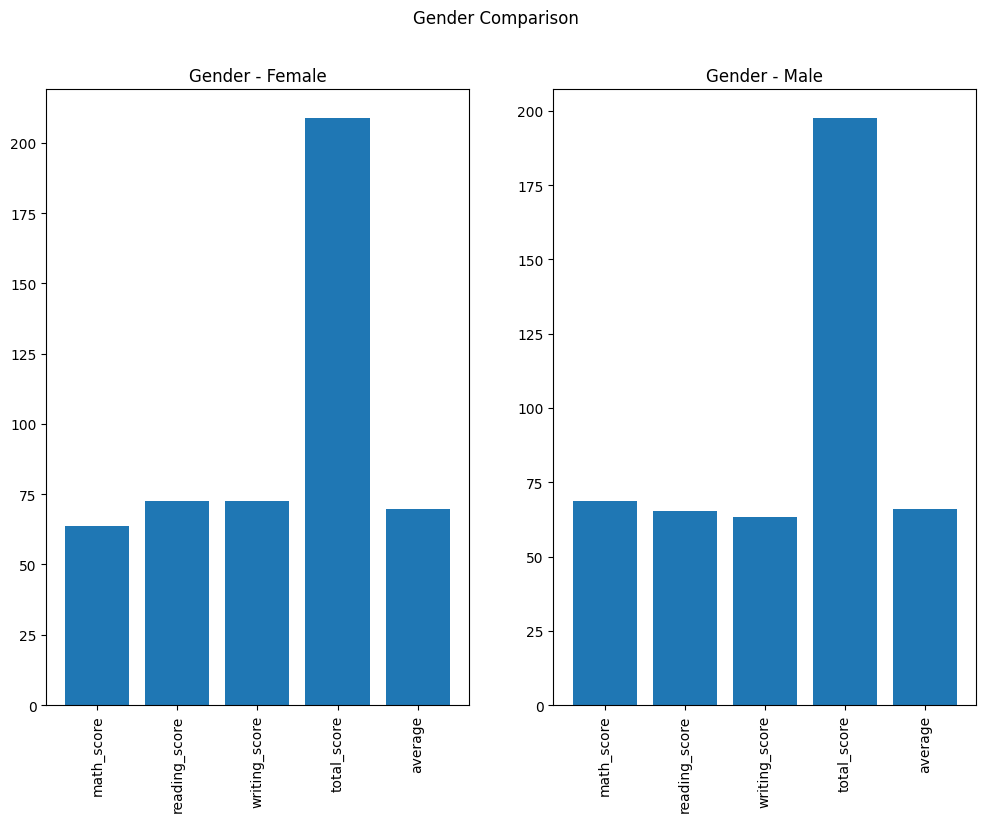

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
plt.subplot(1,2,1)
plt.bar(data=gender_group, x=gender_group.loc['female'].index,height=gender_group.loc['female'].values)
plt.xticks(ticks=range(0, len(gender_group.loc['female'])), labels=gender_group.loc['female'].index, rotation=90)
plt.title("Gender - Female")
plt.subplot(1,2,2)
plt.bar(data=gender_group, x=gender_group.loc['male'].index,height=gender_group.loc['male'].values)
plt.xticks(ticks=range(0, len(gender_group.loc['male'])), labels=gender_group.loc['male'].index, rotation=90)
plt.title("Gender - Male")

plt.suptitle("Gender Comparison")

plt.show()

In [21]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group


,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


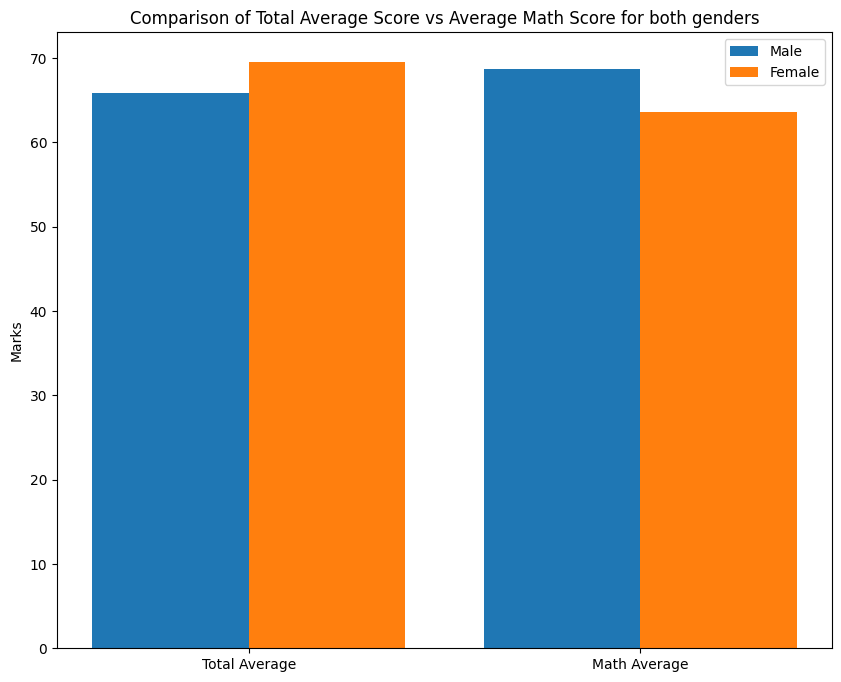

In [61]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']
#female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
#emale_scores
#male_scores = [gender_group['average'][1], gender_group['math_score'][1]]
#male_scores

female_scores = [gender_group.loc['female']['average'], gender_group.loc['female']['math_score']]
#female_scores##[69.56949806949807, 63.633204633204635]
male_scores = [gender_group.loc['male']['average'], gender_group.loc['male']['math_score']]
#male_scores##[65.8374827109267, 68.72821576763485]

X_axis = np.arange(len(X))
#X_axis##array([0, 1])

plt.bar(x=X_axis - 0.2, height=male_scores, width=0.4, label='Male')
plt.bar(x=X_axis + 0.2, height=female_scores, width=0.4, label='Female')
plt.xticks(X_axis, X)
plt.ylabel("Marks")

plt.title("Comparison of Total Average Score vs Average Math Score for both genders", fontweight='light')##fontweight='light', 'bold'

plt.legend()
plt.show()


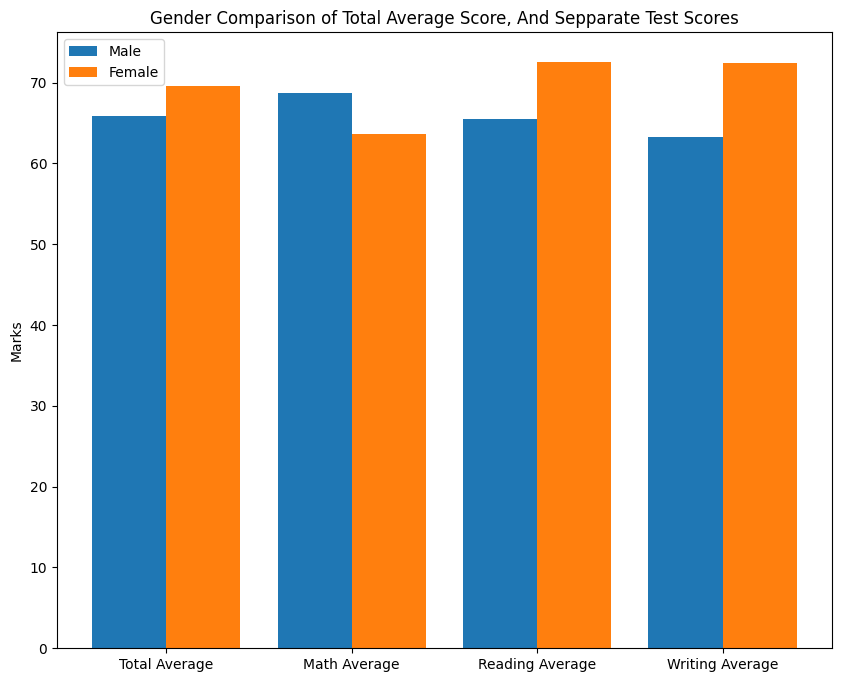

In [67]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average', 'Reading Average', 'Writing Average']
#female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
#emale_scores
#male_scores = [gender_group['average'][1], gender_group['math_score'][1]]
#male_scores

female_scores = [gender_group.loc['female']['average'], gender_group.loc['female']['math_score'], gender_group.loc['female']['reading_score'], gender_group.loc['female']['writing_score']]
#female_scores##[69.56949806949807, 63.633204633204635]
male_scores = [gender_group.loc['male']['average'], gender_group.loc['male']['math_score'], gender_group.loc['male']['reading_score'], gender_group.loc['male']['writing_score']]
male_scores##[65.8374827109267, 68.72821576763485]

X_axis = np.arange(len(X))
#X_axis##array([0, 1, 2, 3])

plt.bar(x=X_axis - 0.2, height=male_scores, width=0.4, label='Male')
plt.bar(x=X_axis + 0.2, height=female_scores, width=0.4, label='Female')
plt.xticks(X_axis, X)
plt.ylabel("Marks")

plt.title("Gender Comparison of Total Average Score, And Sepparate Test Scores", fontweight='light')##fontweight='light', 'bold'

plt.legend()
plt.show()


## Insights
Female students have a higher Total Average score than male students.
On average, male students performed better on math scores.
On average, female students performed significantly better than male students on Reasing and writing exams.

In [68]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

## Race/Ethnicity Column

* How is group-wise distribution?
* Does Race/Ethnicity have an impact on student's performance?


### Univariate analysis - How is group-wise distribution?

In [71]:
df['race_ethnicity'][0:2]

0    group B
1    group C
Name: race_ethnicity, dtype: object

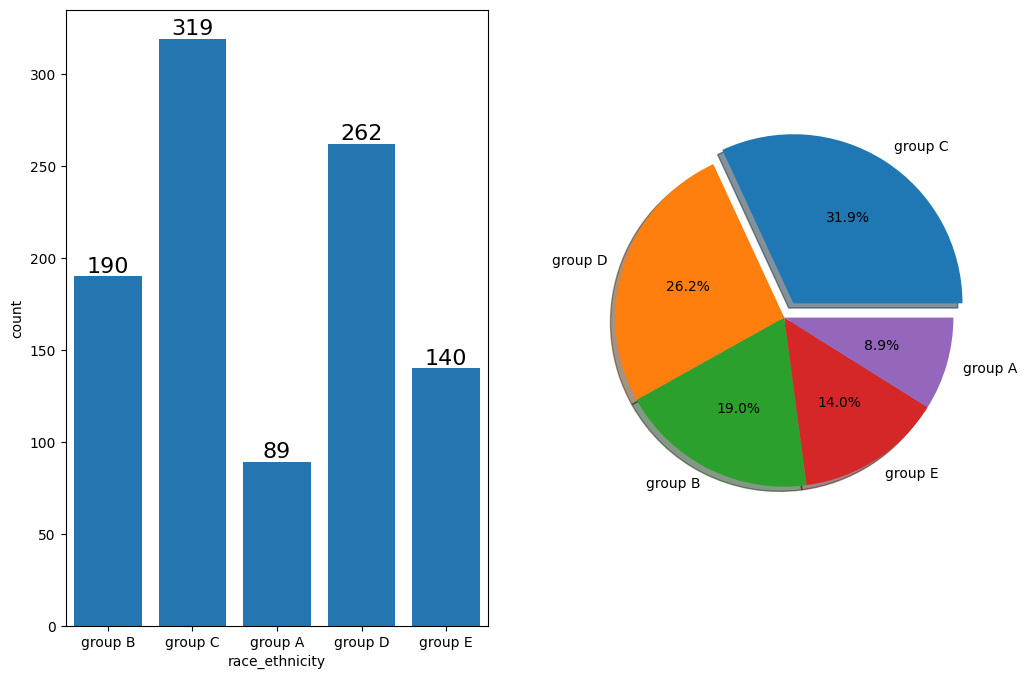

In [ ]:
figure, ax = plt.subplots(1, 2, figsize=(12, 8))
#sns.countplot(data=df, x=df['race_ethnicity'], palette='muted',saturation=0.95, ax=ax[0])
sns.countplot(data=df, x=df['race_ethnicity'], color='tab:blue',saturation=0.95, ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=16)

plt.pie(data=df, x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%', shadow=True)
plt.show()